In [95]:
!pip install pandas_ta

In [96]:
from statsmodels.regression.rolling import RollingOLS
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

In [97]:
bsesn = pd.read_html("https://en.wikipedia.org/wiki/BSE_SENSEX")[1]


In [98]:
symbols_list = bsesn['Symbol'].tolist()


In [99]:
print(symbols_list)

['ASIANPAINT.BO', 'AXISBANK.BO', 'BAJAJ-AUTO.BO', 'BAJFINANCE.BO', 'BAJAJFINSV.BO', 'BHARTIARTL.BO', 'DRREDDY.BO', 'HCLTECH.BO', 'JSWSTEEL.BO', 'HDFCBANK.BO', 'HINDUNILVR.BO', 'ICICIBANK.BO', 'INDUSINDBK.BO', 'INFY.BO', 'ITC.BO', 'KOTAKBANK.BO', 'LT.BO', 'M&M.BO', 'MARUTI.BO', 'NESTLEIND.BO', 'NTPC.BO', 'ONGC.BO', 'POWERGRID.BO', 'RELIANCE.BO', 'SBIN.BO', 'SUNPHARMA.BO', 'TCS.BO', 'TECHM.BO', 'TITAN.BO', 'ULTRACEMCO.BO']


In [100]:
# nifty500 = pd.read_csv('nifty500.csv')
#nifty500['Symbol'] = nifty500['Symbol'].str.replace('.', '-')
end_date = '2023-09-30'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)
df = yf.download(tickers = symbols_list, start = start_date, end = end_date).stack()
df.index.names = ['date', 'ticker']
df.columns = df.columns.str.lower()

[*********************100%%**********************]  30 of 30 completed


In [101]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2 - (2*np.log(2)-1)*(np.log(df['adj close'])-np.log(df['open']))**2
df

adj close        close         high          low  \
date       ticker                                                              
2015-10-05 ASIANPAINT.BO   831.580627   855.000000   856.750000   840.000000   
           AXISBANK.BO     506.534363   512.049988   513.500000   501.299988   
           BAJAJ-AUTO.BO  2213.681885  2384.399902  2399.000000  2311.750000   
           BAJAJFINSV.BO   177.033340   179.774994   181.800003   176.800003   
           BAJFINANCE.BO   497.226013   519.195007   523.630005   511.829987   
...                               ...          ...          ...          ...   
2023-09-29 SUNPHARMA.BO   1159.099976  1159.099976  1167.000000  1135.500000   
           TCS.BO         3521.637451  3530.750000  3568.000000  3506.000000   
           TECHM.BO       1210.049438  1223.099976  1231.800049  1210.050049   
           TITAN.BO       3149.600098  3149.600098  3176.000000  3142.899902   
           ULTRACEMCO.BO  8257.500000  8257.500000  8283.700195  8126.950195   

                                 open    volume  garman_klass_vol  
date       ticker                                                  
2015-10-05 ASIANPAINT.BO   840.000000   96645.0          0.000156  
           AXISBANK.BO     502.549988  543217.0          0.000265  
           BAJAJ-AUTO.BO  2315.300049   26369.0         -0.000092  
           BAJAJFINSV.BO   178.589996   68420.0          0.000359  
           BAJFINANCE.BO   511.829987   47990.0         -0.000064  
...                               ...       ...               ...  
2023-09-29 SUNPHARMA.BO   1148.000000  106658.0          0.000339  
           TCS.BO         3535.000000   83502.0          0.000148  
           TECHM.BO       1229.449951  101778.0          0.000061  
           TITAN.BO       3174.949951   22339.0          0.000030  
           ULTRACEMCO.BO  8200.000000   35684.0          0.000164  

[58613 rows x 7 columns]

In [102]:
df['rsi'] = df.groupby(level = 1)['adj close'].transform(lambda x: pandas_ta.rsi(close = x, length = 20))
df

adj close        close         high          low  \
date       ticker                                                              
2015-10-05 ASIANPAINT.BO   831.580627   855.000000   856.750000   840.000000   
           AXISBANK.BO     506.534363   512.049988   513.500000   501.299988   
           BAJAJ-AUTO.BO  2213.681885  2384.399902  2399.000000  2311.750000   
           BAJAJFINSV.BO   177.033340   179.774994   181.800003   176.800003   
           BAJFINANCE.BO   497.226013   519.195007   523.630005   511.829987   
...                               ...          ...          ...          ...   
2023-09-29 SUNPHARMA.BO   1159.099976  1159.099976  1167.000000  1135.500000   
           TCS.BO         3521.637451  3530.750000  3568.000000  3506.000000   
           TECHM.BO       1210.049438  1223.099976  1231.800049  1210.050049   
           TITAN.BO       3149.600098  3149.600098  3176.000000  3142.899902   
           ULTRACEMCO.BO  8257.500000  8257.500000  8283.700195  8126.950195   

                                 open    volume  garman_klass_vol        rsi  
date       ticker                                                             
2015-10-05 ASIANPAINT.BO   840.000000   96645.0          0.000156        NaN  
           AXISBANK.BO     502.549988  543217.0          0.000265        NaN  
           BAJAJ-AUTO.BO  2315.300049   26369.0         -0.000092        NaN  
           BAJAJFINSV.BO   178.589996   68420.0          0.000359        NaN  
           BAJFINANCE.BO   511.829987   47990.0         -0.000064        NaN  
...                               ...       ...               ...        ...  
2023-09-29 SUNPHARMA.BO   1148.000000  106658.0          0.000339  61.550004  
           TCS.BO         3535.000000   83502.0          0.000148  55.929346  
           TECHM.BO       1229.449951  101778.0          0.000061  48.106939  
           TITAN.BO       3174.949951   22339.0          0.000030  50.721562  
           ULTRACEMCO.BO  8200.000000   35684.0          0.000164  48.445095  

[58613 rows x 8 columns]

In [103]:
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length = 20).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length = 20).iloc[:,1])
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length = 20).iloc[:,2])
df

adj close        close         high          low  \
date       ticker                                                              
2015-10-05 ASIANPAINT.BO   831.580627   855.000000   856.750000   840.000000   
           AXISBANK.BO     506.534363   512.049988   513.500000   501.299988   
           BAJAJ-AUTO.BO  2213.681885  2384.399902  2399.000000  2311.750000   
           BAJAJFINSV.BO   177.033340   179.774994   181.800003   176.800003   
           BAJFINANCE.BO   497.226013   519.195007   523.630005   511.829987   
...                               ...          ...          ...          ...   
2023-09-29 SUNPHARMA.BO   1159.099976  1159.099976  1167.000000  1135.500000   
           TCS.BO         3521.637451  3530.750000  3568.000000  3506.000000   
           TECHM.BO       1210.049438  1223.099976  1231.800049  1210.050049   
           TITAN.BO       3149.600098  3149.600098  3176.000000  3142.899902   
           ULTRACEMCO.BO  8257.500000  8257.500000  8283.700195  8126.950195   

                                 open    volume  garman_klass_vol        rsi  \
date       ticker                                                              
2015-10-05 ASIANPAINT.BO   840.000000   96645.0          0.000156        NaN   
           AXISBANK.BO     502.549988  543217.0          0.000265        NaN   
           BAJAJ-AUTO.BO  2315.300049   26369.0         -0.000092        NaN   
           BAJAJFINSV.BO   178.589996   68420.0          0.000359        NaN   
           BAJFINANCE.BO   511.829987   47990.0         -0.000064        NaN   
...                               ...       ...               ...        ...   
2023-09-29 SUNPHARMA.BO   1148.000000  106658.0          0.000339  61.550004   
           TCS.BO         3535.000000   83502.0          0.000148  55.929346   
           TECHM.BO       1229.449951  101778.0          0.000061  48.106939   
           TITAN.BO       3174.949951   22339.0          0.000030  50.721562   
           ULTRACEMCO.BO  8200.000000   35684.0          0.000164  48.445095   

                            bb_low    bb_mid   bb_high  
date       ticker                                       
2015-10-05 ASIANPAINT.BO       NaN       NaN       NaN  
           AXISBANK.BO         NaN       NaN       NaN  
           BAJAJ-AUTO.BO       NaN       NaN       NaN  
           BAJAJFINSV.BO       NaN       NaN       NaN  
           BAJFINANCE.BO       NaN       NaN       NaN  
...                            ...       ...       ...  
2023-09-29 SUNPHARMA.BO   7.013741  7.036842  7.059944  
           TCS.BO         8.123740  8.165857  8.207975  
           TECHM.BO       7.098457  7.135717  7.172977  
           TITAN.BO       8.035243  8.076707  8.118170  
           ULTRACEMCO.BO  8.996939  9.038927  9.080914  

[58613 rows x 11 columns]

In [104]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high = stock_data['high'], low = stock_data['low'], close= stock_data['close'], length = 14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level = 1, group_keys = False).apply(compute_atr)
df

adj close        close         high          low  \
date       ticker                                                              
2015-10-05 ASIANPAINT.BO   831.580627   855.000000   856.750000   840.000000   
           AXISBANK.BO     506.534363   512.049988   513.500000   501.299988   
           BAJAJ-AUTO.BO  2213.681885  2384.399902  2399.000000  2311.750000   
           BAJAJFINSV.BO   177.033340   179.774994   181.800003   176.800003   
           BAJFINANCE.BO   497.226013   519.195007   523.630005   511.829987   
...                               ...          ...          ...          ...   
2023-09-29 SUNPHARMA.BO   1159.099976  1159.099976  1167.000000  1135.500000   
           TCS.BO         3521.637451  3530.750000  3568.000000  3506.000000   
           TECHM.BO       1210.049438  1223.099976  1231.800049  1210.050049   
           TITAN.BO       3149.600098  3149.600098  3176.000000  3142.899902   
           ULTRACEMCO.BO  8257.500000  8257.500000  8283.700195  8126.950195   

                                 open    volume  garman_klass_vol        rsi  \
date       ticker                                                              
2015-10-05 ASIANPAINT.BO   840.000000   96645.0          0.000156        NaN   
           AXISBANK.BO     502.549988  543217.0          0.000265        NaN   
           BAJAJ-AUTO.BO  2315.300049   26369.0         -0.000092        NaN   
           BAJAJFINSV.BO   178.589996   68420.0          0.000359        NaN   
           BAJFINANCE.BO   511.829987   47990.0         -0.000064        NaN   
...                               ...       ...               ...        ...   
2023-09-29 SUNPHARMA.BO   1148.000000  106658.0          0.000339  61.550004   
           TCS.BO         3535.000000   83502.0          0.000148  55.929346   
           TECHM.BO       1229.449951  101778.0          0.000061  48.106939   
           TITAN.BO       3174.949951   22339.0          0.000030  50.721562   
           ULTRACEMCO.BO  8200.000000   35684.0          0.000164  48.445095   

                            bb_low    bb_mid   bb_high       atr  
date       ticker                                                 
2015-10-05 ASIANPAINT.BO       NaN       NaN       NaN       NaN  
           AXISBANK.BO         NaN       NaN       NaN       NaN  
           BAJAJ-AUTO.BO       NaN       NaN       NaN       NaN  
           BAJAJFINSV.BO       NaN       NaN       NaN       NaN  
           BAJFINANCE.BO       NaN       NaN       NaN       NaN  
...                            ...       ...       ...       ...  
2023-09-29 SUNPHARMA.BO   7.013741  7.036842  7.059944  0.094237  
           TCS.BO         8.123740  8.165857  8.207975  0.389877  
           TECHM.BO       7.098457  7.135717  7.172977  0.564341  
           TITAN.BO       8.035243  8.076707  8.118170  1.060951  
           ULTRACEMCO.BO  8.996939  9.038927  9.080914  0.461360  

[58613 rows x 12 columns]

In [105]:
def compute_macd(close):
    macd = pandas_ta.macd(close = close, length = 14).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
df['macd'] = df.groupby(level = 1, group_keys = False)['adj close'].apply(compute_macd)
df

adj close        close         high          low  \
date       ticker                                                              
2015-10-05 ASIANPAINT.BO   831.580627   855.000000   856.750000   840.000000   
           AXISBANK.BO     506.534363   512.049988   513.500000   501.299988   
           BAJAJ-AUTO.BO  2213.681885  2384.399902  2399.000000  2311.750000   
           BAJAJFINSV.BO   177.033340   179.774994   181.800003   176.800003   
           BAJFINANCE.BO   497.226013   519.195007   523.630005   511.829987   
...                               ...          ...          ...          ...   
2023-09-29 SUNPHARMA.BO   1159.099976  1159.099976  1167.000000  1135.500000   
           TCS.BO         3521.637451  3530.750000  3568.000000  3506.000000   
           TECHM.BO       1210.049438  1223.099976  1231.800049  1210.050049   
           TITAN.BO       3149.600098  3149.600098  3176.000000  3142.899902   
           ULTRACEMCO.BO  8257.500000  8257.500000  8283.700195  8126.950195   

                                 open    volume  garman_klass_vol        rsi  \
date       ticker                                                              
2015-10-05 ASIANPAINT.BO   840.000000   96645.0          0.000156        NaN   
           AXISBANK.BO     502.549988  543217.0          0.000265        NaN   
           BAJAJ-AUTO.BO  2315.300049   26369.0         -0.000092        NaN   
           BAJAJFINSV.BO   178.589996   68420.0          0.000359        NaN   
           BAJFINANCE.BO   511.829987   47990.0         -0.000064        NaN   
...                               ...       ...               ...        ...   
2023-09-29 SUNPHARMA.BO   1148.000000  106658.0          0.000339  61.550004   
           TCS.BO         3535.000000   83502.0          0.000148  55.929346   
           TECHM.BO       1229.449951  101778.0          0.000061  48.106939   
           TITAN.BO       3174.949951   22339.0          0.000030  50.721562   
           ULTRACEMCO.BO  8200.000000   35684.0          0.000164  48.445095   

                            bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                           
2015-10-05 ASIANPAINT.BO       NaN       NaN       NaN       NaN       NaN  
           AXISBANK.BO         NaN       NaN       NaN       NaN       NaN  
           BAJAJ-AUTO.BO       NaN       NaN       NaN       NaN       NaN  
           BAJAJFINSV.BO       NaN       NaN       NaN       NaN       NaN  
           BAJFINANCE.BO       NaN       NaN       NaN       NaN       NaN  
...                            ...       ...       ...       ...       ...  
2023-09-29 SUNPHARMA.BO   7.013741  7.036842  7.059944  0.094237  0.465083  
           TCS.BO         8.123740  8.165857  8.207975  0.389877  0.919997  
           TECHM.BO       7.098457  7.135717  7.172977  0.564341  0.534651  
           TITAN.BO       8.035243  8.076707  8.118170  1.060951  0.846762  
           ULTRACEMCO.BO  8.996939  9.038927  9.080914  0.461360 -0.412787  

[58613 rows x 13 columns]

In [106]:
df['rs_volume'] = (df['adj close']*df['volume'])/1e6
df

adj close        close         high          low  \
date       ticker                                                              
2015-10-05 ASIANPAINT.BO   831.580627   855.000000   856.750000   840.000000   
           AXISBANK.BO     506.534363   512.049988   513.500000   501.299988   
           BAJAJ-AUTO.BO  2213.681885  2384.399902  2399.000000  2311.750000   
           BAJAJFINSV.BO   177.033340   179.774994   181.800003   176.800003   
           BAJFINANCE.BO   497.226013   519.195007   523.630005   511.829987   
...                               ...          ...          ...          ...   
2023-09-29 SUNPHARMA.BO   1159.099976  1159.099976  1167.000000  1135.500000   
           TCS.BO         3521.637451  3530.750000  3568.000000  3506.000000   
           TECHM.BO       1210.049438  1223.099976  1231.800049  1210.050049   
           TITAN.BO       3149.600098  3149.600098  3176.000000  3142.899902   
           ULTRACEMCO.BO  8257.500000  8257.500000  8283.700195  8126.950195   

                                 open    volume  garman_klass_vol        rsi  \
date       ticker                                                              
2015-10-05 ASIANPAINT.BO   840.000000   96645.0          0.000156        NaN   
           AXISBANK.BO     502.549988  543217.0          0.000265        NaN   
           BAJAJ-AUTO.BO  2315.300049   26369.0         -0.000092        NaN   
           BAJAJFINSV.BO   178.589996   68420.0          0.000359        NaN   
           BAJFINANCE.BO   511.829987   47990.0         -0.000064        NaN   
...                               ...       ...               ...        ...   
2023-09-29 SUNPHARMA.BO   1148.000000  106658.0          0.000339  61.550004   
           TCS.BO         3535.000000   83502.0          0.000148  55.929346   
           TECHM.BO       1229.449951  101778.0          0.000061  48.106939   
           TITAN.BO       3174.949951   22339.0          0.000030  50.721562   
           ULTRACEMCO.BO  8200.000000   35684.0          0.000164  48.445095   

                            bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                            
2015-10-05 ASIANPAINT.BO       NaN       NaN       NaN       NaN       NaN   
           AXISBANK.BO         NaN       NaN       NaN       NaN       NaN   
           BAJAJ-AUTO.BO       NaN       NaN       NaN       NaN       NaN   
           BAJAJFINSV.BO       NaN       NaN       NaN       NaN       NaN   
           BAJFINANCE.BO       NaN       NaN       NaN       NaN       NaN   
...                            ...       ...       ...       ...       ...   
2023-09-29 SUNPHARMA.BO   7.013741  7.036842  7.059944  0.094237  0.465083   
           TCS.BO         8.123740  8.165857  8.207975  0.389877  0.919997   
           TECHM.BO       7.098457  7.135717  7.172977  0.564341  0.534651   
           TITAN.BO       8.035243  8.076707  8.118170  1.060951  0.846762   
           ULTRACEMCO.BO  8.996939  9.038927  9.080914  0.461360 -0.412787   

                           rs_volume  
date       ticker                     
2015-10-05 ASIANPAINT.BO   80.368110  
           AXISBANK.BO    275.158077  
           BAJAJ-AUTO.BO   58.372578  
           BAJAJFINSV.BO   12.112621  
           BAJFINANCE.BO   23.861876  
...                              ...  
2023-09-29 SUNPHARMA.BO   123.627285  
           TCS.BO         294.063770  
           TECHM.BO       123.156412  
           TITAN.BO        70.358917  
           ULTRACEMCO.BO  294.660630  

[58613 rows x 14 columns]

In [107]:
df.index.set_levels(pd.to_datetime(df.index.levels[0]), level=0, inplace=True)
df.dropna(subset=['rs_volume'], inplace=True)

In [108]:
df.unstack('ticker')['rs_volume'].resample('M').mean().stack('ticker').to_frame('rs_volume')

rs_volume
date       ticker                   
2015-10-31 ASIANPAINT.BO   98.754203
           AXISBANK.BO    444.983701
           BAJAJ-AUTO.BO   57.515899
           BAJAJFINSV.BO   38.691359
           BAJFINANCE.BO   19.235374
...                              ...
2023-09-30 SUNPHARMA.BO   107.215412
           TCS.BO         287.397814
           TECHM.BO       119.388218
           TITAN.BO        85.621430
           ULTRACEMCO.BO  101.131796

[2880 rows x 1 columns]

In [109]:
last_cols = [c for c in df.columns.unique(0) if c not in ['rs_volume', 'volume', 'open', 'high', 'low', 'close']]
last_cols

['adj close',
 'garman_klass_vol',
 'rsi',
 'bb_low',
 'bb_mid',
 'bb_high',
 'atr',
 'macd']

In [110]:
data = (pd.concat([df.unstack('ticker')['rs_volume'].resample('M').mean().stack('ticker').to_frame('rs_volume'), df.unstack()[last_cols].resample('M').last().stack('ticker')], axis =1)).dropna()
data

rs_volume    adj close       atr   bb_high  \
date       ticker                                                       
2015-11-30 ASIANPAINT.BO   71.828612   819.607178 -1.174598  6.738211   
           AXISBANK.BO    318.051322   463.799713 -1.300321  6.171425   
           BAJAJ-AUTO.BO   52.003588  2303.876221 -0.562165  7.774137   
           BAJAJFINSV.BO   11.395946   190.750916 -1.343667  5.283691   
           BAJFINANCE.BO   15.280606   527.393127 -1.430401  6.288313   
...                              ...          ...       ...       ...   
2023-09-30 SUNPHARMA.BO   107.215412  1159.099976  0.094237  7.059944   
           TCS.BO         287.397814  3521.637451  0.389877  8.207975   
           TECHM.BO       119.388218  1210.049438  0.564341  7.172977   
           TITAN.BO        85.621430  3149.600098  1.060951  8.118170   
           ULTRACEMCO.BO  101.131796  8257.500000  0.461360  9.080914   

                            bb_low    bb_mid  garman_klass_vol      macd  \
date       ticker                                                          
2015-11-30 ASIANPAINT.BO  6.641344  6.689777         -0.000497 -0.271026   
           AXISBANK.BO    6.114894  6.143160          0.000057 -0.752483   
           BAJAJ-AUTO.BO  7.680533  7.727335         -0.001458 -0.165983   
           BAJAJFINSV.BO  5.239488  5.261589          0.000066 -0.052618   
           BAJFINANCE.BO  6.194158  6.241235         -0.001071 -0.122768   
...                            ...       ...               ...       ...   
2023-09-30 SUNPHARMA.BO   7.013741  7.036842          0.000339  0.465083   
           TCS.BO         8.123740  8.165857          0.000148  0.919997   
           TECHM.BO       7.098457  7.135717          0.000061  0.534651   
           TITAN.BO       8.035243  8.076707          0.000030  0.846762   
           ULTRACEMCO.BO  8.996939  9.038927          0.000164 -0.412787   

                                rsi  
date       ticker                    
2015-11-30 ASIANPAINT.BO  51.359295  
           AXISBANK.BO    41.539454  
           BAJAJ-AUTO.BO  53.749957  
           BAJAJFINSV.BO  56.953046  
           BAJFINANCE.BO  62.675466  
...                             ...  
2023-09-30 SUNPHARMA.BO   61.550004  
           TCS.BO         55.929346  
           TECHM.BO       48.106939  
           TITAN.BO       50.721562  
           ULTRACEMCO.BO  48.445095  

[2850 rows x 9 columns]

In [111]:
data['rs_volume'] = (data.loc[:,'rs_volume'].unstack('ticker').rolling(5*12, min_periods = 12).mean().stack())
data

rs_volume    adj close       atr   bb_high  \
date       ticker                                                       
2015-11-30 ASIANPAINT.BO         NaN   819.607178 -1.174598  6.738211   
           AXISBANK.BO           NaN   463.799713 -1.300321  6.171425   
           BAJAJ-AUTO.BO         NaN  2303.876221 -0.562165  7.774137   
           BAJAJFINSV.BO         NaN   190.750916 -1.343667  5.283691   
           BAJFINANCE.BO         NaN   527.393127 -1.430401  6.288313   
...                              ...          ...       ...       ...   
2023-09-30 SUNPHARMA.BO   175.757881  1159.099976  0.094237  7.059944   
           TCS.BO         396.050948  3521.637451  0.389877  8.207975   
           TECHM.BO       140.837986  1210.049438  0.564341  7.172977   
           TITAN.BO       132.983080  3149.600098  1.060951  8.118170   
           ULTRACEMCO.BO  111.300968  8257.500000  0.461360  9.080914   

                            bb_low    bb_mid  garman_klass_vol      macd  \
date       ticker                                                          
2015-11-30 ASIANPAINT.BO  6.641344  6.689777         -0.000497 -0.271026   
           AXISBANK.BO    6.114894  6.143160          0.000057 -0.752483   
           BAJAJ-AUTO.BO  7.680533  7.727335         -0.001458 -0.165983   
           BAJAJFINSV.BO  5.239488  5.261589          0.000066 -0.052618   
           BAJFINANCE.BO  6.194158  6.241235         -0.001071 -0.122768   
...                            ...       ...               ...       ...   
2023-09-30 SUNPHARMA.BO   7.013741  7.036842          0.000339  0.465083   
           TCS.BO         8.123740  8.165857          0.000148  0.919997   
           TECHM.BO       7.098457  7.135717          0.000061  0.534651   
           TITAN.BO       8.035243  8.076707          0.000030  0.846762   
           ULTRACEMCO.BO  8.996939  9.038927          0.000164 -0.412787   

                                rsi  
date       ticker                    
2015-11-30 ASIANPAINT.BO  51.359295  
           AXISBANK.BO    41.539454  
           BAJAJ-AUTO.BO  53.749957  
           BAJAJFINSV.BO  56.953046  
           BAJFINANCE.BO  62.675466  
...                             ...  
2023-09-30 SUNPHARMA.BO   61.550004  
           TCS.BO         55.929346  
           TECHM.BO       48.106939  
           TITAN.BO       50.721562  
           ULTRACEMCO.BO  48.445095  

[2850 rows x 9 columns]

In [112]:
data['rs_volume_rank'] = data.groupby('date')['rs_volume'].rank(ascending = False)

In [113]:
data = data.drop(['rs_volume', 'rs_volume_rank'], axis = 1)
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                               
2015-11-30 ASIANPAINT.BO   819.607178 -1.174598  6.738211  6.641344  6.689777   
           AXISBANK.BO     463.799713 -1.300321  6.171425  6.114894  6.143160   
           BAJAJ-AUTO.BO  2303.876221 -0.562165  7.774137  7.680533  7.727335   
           BAJAJFINSV.BO   190.750916 -1.343667  5.283691  5.239488  5.261589   
           BAJFINANCE.BO   527.393127 -1.430401  6.288313  6.194158  6.241235   
...                               ...       ...       ...       ...       ...   
2023-09-30 SUNPHARMA.BO   1159.099976  0.094237  7.059944  7.013741  7.036842   
           TCS.BO         3521.637451  0.389877  8.207975  8.123740  8.165857   
           TECHM.BO       1210.049438  0.564341  7.172977  7.098457  7.135717   
           TITAN.BO       3149.600098  1.060951  8.118170  8.035243  8.076707   
           ULTRACEMCO.BO  8257.500000  0.461360  9.080914  8.996939  9.038927   

                          garman_klass_vol      macd        rsi  
date       ticker                                                
2015-11-30 ASIANPAINT.BO         -0.000497 -0.271026  51.359295  
           AXISBANK.BO            0.000057 -0.752483  41.539454  
           BAJAJ-AUTO.BO         -0.001458 -0.165983  53.749957  
           BAJAJFINSV.BO          0.000066 -0.052618  56.953046  
           BAJFINANCE.BO         -0.001071 -0.122768  62.675466  
...                                    ...       ...        ...  
2023-09-30 SUNPHARMA.BO           0.000339  0.465083  61.550004  
           TCS.BO                 0.000148  0.919997  55.929346  
           TECHM.BO               0.000061  0.534651  48.106939  
           TITAN.BO               0.000030  0.846762  50.721562  
           ULTRACEMCO.BO          0.000164 -0.412787  48.445095  

[2850 rows x 8 columns]

In [114]:
def calculate_return(df):
    outliers_cutoff = 0.005
    lags = [1,2,3,6,9,12]
    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close']
                                .pct_change(lag)
                                .pipe(lambda x: x.clip(lower = x.quantile(outliers_cutoff), upper = x.quantile(1-outliers_cutoff))).add(1).pow(1/lag).sub(1))
    return df
data = data.groupby(level =1, group_keys = False).apply(calculate_return).dropna()

In [115]:
factor_data = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv')
factor_data =factor_data.drop('RF', axis = 1)

In [116]:
factor_data.set_index("Unnamed: 0", inplace=True)
factor_data.index.name = "date"
factor_data.index = pd.to_datetime(factor_data.index, format='%Y%m')

In [117]:
factor_data = factor_data.div(100)
factor_data = factor_data.resample('M').last()
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
date,,,,,
2010-01-31,-0.0336,0.0034,0.0043,-0.0127,0.0046
2010-02-28,0.0340,0.0151,0.0323,-0.0027,0.0143
2010-03-31,0.0631,0.0185,0.0221,-0.0065,0.0169
2010-04-30,0.0200,0.0498,0.0289,0.0069,0.0172
2010-05-31,-0.0789,0.0004,-0.0244,0.0130,-0.0021
...,...,...,...,...,...
2023-05-31,0.0035,-0.0038,-0.0772,-0.0181,-0.0722
2023-06-30,0.0646,0.0134,-0.0026,0.0218,-0.0162
2023-07-31,0.0321,0.0286,0.0411,-0.0057,0.0057


In [118]:
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2016-11-30 ASIANPAINT.BO  0.0486  0.0707  0.0821 -0.0018  0.0370  -0.091348
           AXISBANK.BO    0.0486  0.0707  0.0821 -0.0018  0.0370  -0.034628
           BAJAJ-AUTO.BO  0.0486  0.0707  0.0821 -0.0018  0.0370  -0.053234
           BAJAJFINSV.BO  0.0486  0.0707  0.0821 -0.0018  0.0370  -0.117256
           BAJFINANCE.BO  0.0486  0.0707  0.0821 -0.0018  0.0370  -0.143110
...                          ...     ...     ...     ...     ...        ...
2023-09-30 SUNPHARMA.BO  -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.042122
           TCS.BO        -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.051742
           TECHM.BO      -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.017766
           TITAN.BO      -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.013662
           ULTRACEMCO.BO -0.0524 -0.0179  0.0152  0.0187 -0.0082  -0.006927

[2490 rows x 6 columns]

In [119]:
observations = factor_data.groupby(level = 1).size()
valid_stocks = observations[observations >= 10]
valid_stocks

ticker
ASIANPAINT.BO    83
AXISBANK.BO      83
BAJAJ-AUTO.BO    83
BAJAJFINSV.BO    83
BAJFINANCE.BO    83
BHARTIARTL.BO    83
DRREDDY.BO       83
HCLTECH.BO       83
HDFCBANK.BO      83
HINDUNILVR.BO    83
ICICIBANK.BO     83
INDUSINDBK.BO    83
INFY.BO          83
ITC.BO           83
JSWSTEEL.BO      83
KOTAKBANK.BO     83
LT.BO            83
M&M.BO           83
MARUTI.BO        83
NESTLEIND.BO     83
NTPC.BO          83
ONGC.BO          83
POWERGRID.BO     83
RELIANCE.BO      83
SBIN.BO          83
SUNPHARMA.BO     83
TCS.BO           83
TECHM.BO         83
TITAN.BO         83
ULTRACEMCO.BO    83
dtype: int64

In [120]:
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2016-11-30 ASIANPAINT.BO  0.0486  0.0707  0.0821 -0.0018  0.0370  -0.091348
           AXISBANK.BO    0.0486  0.0707  0.0821 -0.0018  0.0370  -0.034628
           BAJAJ-AUTO.BO  0.0486  0.0707  0.0821 -0.0018  0.0370  -0.053234
           BAJAJFINSV.BO  0.0486  0.0707  0.0821 -0.0018  0.0370  -0.117256
           BAJFINANCE.BO  0.0486  0.0707  0.0821 -0.0018  0.0370  -0.143110
...                          ...     ...     ...     ...     ...        ...
2023-09-30 SUNPHARMA.BO  -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.042122
           TCS.BO        -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.051742
           TECHM.BO      -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.017766
           TITAN.BO      -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.013662
           ULTRACEMCO.BO -0.0524 -0.0179  0.0152  0.0187 -0.0082  -0.006927

[2490 rows x 6 columns]

In [121]:
betas = (factor_data.groupby(level=1, group_keys=False).apply(lambda x: RollingOLS(endog=x['return_1m'], exog=sm.add_constant(x.drop('return_1m', axis =1)), window = min(24, x.shape[0]), min_nobs= len(x.columns)+1).fit(params_only = True).params.drop('const', axis = 1)))

In [122]:
betas.groupby('ticker').shift()

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                         
2016-11-30 ASIANPAINT.BO       NaN       NaN       NaN       NaN       NaN
           AXISBANK.BO         NaN       NaN       NaN       NaN       NaN
           BAJAJ-AUTO.BO       NaN       NaN       NaN       NaN       NaN
           BAJAJFINSV.BO       NaN       NaN       NaN       NaN       NaN
           BAJFINANCE.BO       NaN       NaN       NaN       NaN       NaN
...                            ...       ...       ...       ...       ...
2023-09-30 SUNPHARMA.BO   0.545581  0.276871 -0.084692 -0.089756  0.234677
           TCS.BO         0.352025  0.515277 -0.338345  0.395022  0.516458
           TECHM.BO       0.860970 -0.103929 -0.488583  0.115485  0.133972
           TITAN.BO       0.613695 -0.545163  0.102278 -0.755609 -0.285797
           ULTRACEMCO.BO  0.682154 -0.117230 -0.109247  0.176476 -0.193386

[2490 rows x 5 columns]

In [123]:
data = (data.join(betas.groupby('ticker').shift()))

In [124]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

In [125]:
data.loc[:, factors] = data.groupby('ticker', group_keys = False)[factors].apply(lambda x: x.fillna(x.mean()))

In [126]:
data = data.drop('adj close', axis = 1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2490 entries, (Timestamp('2016-11-30 00:00:00', freq='M'), 'ASIANPAINT.BO') to (Timestamp('2023-09-30 00:00:00', freq='M'), 'ULTRACEMCO.BO')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               2490 non-null   float64
 1   bb_high           2490 non-null   float64
 2   bb_low            2490 non-null   float64
 3   bb_mid            2490 non-null   float64
 4   garman_klass_vol  2490 non-null   float64
 5   macd              2490 non-null   float64
 6   rsi               2490 non-null   float64
 7   return_1m         2490 non-null   float64
 8   return_2m         2490 non-null   float64
 9   return_3m         2490 non-null   float64
 10  return_6m         2490 non-null   float64
 11  return_9m         2490 non-null   float64
 12  return_12m        2490 non-null   float64
 13  Mkt-RF            2490 non-null   float64
 14  SMB               2

In [127]:
target_rsi_values = [30, 45, 55, 70]
initial_centroids = np.zeros((len(target_rsi_values), 18))
initial_centroids[:, 6] = target_rsi_values
initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [128]:
from sklearn.cluster import KMeans

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4, random_state=0, init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date',group_keys=False).apply(get_clusters)

In [129]:
def plot_clusters(data):
    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]
    
    plt.scatter(cluster_0.iloc[:, 0], cluster_0.iloc[:, 6], color='red', label='cluster_0')
    plt.scatter(cluster_1.iloc[:, 0], cluster_1.iloc[:, 6], color='green', label='cluster_1')
    plt.scatter(cluster_2.iloc[:, 0], cluster_2.iloc[:, 6], color='blue', label='cluster_2')
    plt.scatter(cluster_3.iloc[:, 0], cluster_3.iloc[:, 6], color='black', label='cluster_3')
    plt.legend()
    plt.show()
    return

In [130]:
# plt.style.use('ggplot')

# for i in data.index.get_level_values('date').unique().tolist():
#     g = data.xs(i, level=0)
#     plt.title(f'date{i}')
#     plot_clusters(g)

## Efficient Frontier Max Sharpe

In [131]:
filtered_df = data[data['cluster']==1].copy()
filtered_df

atr   bb_high    bb_low    bb_mid  \
date       ticker                                                  
2016-11-30 BAJAJ-AUTO.BO  0.053135  7.920506  7.764676  7.842591   
           BAJAJFINSV.BO -0.702249  5.801322  5.613457  5.707389   
           BAJFINANCE.BO -0.857651  6.942960  6.661180  6.802070   
           ITC.BO         0.572826  5.541602  5.369252  5.455427   
           LT.BO         -0.911959  6.845319  6.757782  6.801550   
...                            ...       ...       ...       ...   
2023-09-30 ITC.BO         1.101471  6.122136  6.083345  6.102741   
           JSWSTEEL.BO    0.586846  6.729722  6.639697  6.684709   
           M&M.BO         2.494634  7.398675  7.335532  7.367104   
           TECHM.BO       0.564341  7.172977  7.098457  7.135717   
           ULTRACEMCO.BO  0.461360  9.080914  8.996939  9.038927   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2016-11-30 BAJAJ-AUTO.BO         -0.000978 -0.995380  46.849602  -0.053234   
           BAJAJFINSV.BO          0.000510 -0.393414  47.110689  -0.117256   
           BAJFINANCE.BO          0.000426 -0.577952  45.331052  -0.143110   
           ITC.BO                 0.000149 -1.069744  45.472317  -0.039786   
           LT.BO                  0.000389 -0.819637  44.751148  -0.064517   
...                                    ...       ...        ...        ...   
2023-09-30 ITC.BO                 0.000085 -0.467662  48.081724   0.010804   
           JSWSTEEL.BO            0.000104 -0.766499  46.067805  -0.000833   
           M&M.BO                 0.000082  0.351687  50.040099  -0.014244   
           TECHM.BO               0.000061  0.534651  48.106939   0.017766   
           ULTRACEMCO.BO          0.000164 -0.412787  48.445095  -0.006927   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2016-11-30 BAJAJ-AUTO.BO  -0.026552  -0.034403   0.004401   0.025047   
           BAJAJFINSV.BO  -0.014567   0.002086   0.085578   0.072230   
           BAJFINANCE.BO  -0.067182  -0.058600   0.034213   0.054239   
           ITC.BO         -0.018068  -0.036088  -0.001069   0.022756   
           LT.BO          -0.017298  -0.029789  -0.007614   0.030003   
...                             ...        ...        ...        ...   
2023-09-30 ITC.BO         -0.026112  -0.005380   0.024891   0.033051   
           JSWSTEEL.BO    -0.015543  -0.000943   0.021677   0.002100   
           M&M.BO          0.028899   0.022401   0.050122   0.024521   
           TECHM.BO        0.058933   0.035468   0.021950   0.023710   
           ULTRACEMCO.BO  -0.002672   0.000096   0.014252   0.019707   

                          return_12m    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                              
2016-11-30 BAJAJ-AUTO.BO    0.008570  0.565075  0.231593 -0.017009  0.098065   
           BAJAJFINSV.BO    0.037608  0.805494 -0.033461  0.703092 -0.534543   
           BAJFINANCE.BO    0.046809  0.593252  0.203091  0.660603 -0.524904   
           ITC.BO           0.004500  0.509511 -0.152282  0.133900 -0.181882   
           LT.BO            0.002049  0.464111  0.174557  0.203749  0.088954   
...                              ...       ...       ...       ...       ...   
2023-09-30 ITC.BO           0.024597  0.214630  0.188480 -0.297225 -0.929896   
           JSWSTEEL.BO      0.017990  0.654231  0.313559 -1.461453 -0.293631   
           M&M.BO           0.017028  0.173629 -0.078717  1.083045 -0.188231   
           TECHM.BO         0.018426  0.860970 -0.103929 -0.488583  0.115485   
           ULTRACEMCO.BO    0.023874  0.682154 -0.117230 -0.109247  0.176476   

                               CMA  cluster  
date       ticker                            
2016-11-30 BAJAJ-AUTO.BO  0.573898        1  
           BAJA

In [132]:
filtered_df = filtered_df.reset_index(level = 1)

In [133]:
filtered_df.head()

,ticker,atr,bb_high,bb_low,bb_mid,garman_klass_vol,macd,rsi,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m,Mkt-RF,SMB,HML,RMW,CMA,cluster
date,,,,,,,,,,,,,,,,,,,,
2016-11-30,BAJAJ-AUTO.BO,0.053135,7.920506,7.764676,7.842591,-0.000978,-0.995380,46.849602,-0.053234,-0.026552,-0.034403,0.004401,0.025047,0.008570,0.565075,0.231593,-0.017009,0.098065,0.573898,1
2016-11-30,BAJAJFINSV.BO,-0.702249,5.801322,5.613457,5.707389,0.000510,-0.393414,47.110689,-0.117256,-0.014567,0.002086,0.085578,0.072230,0.037608,0.805494,-0.033461,0.703092,-0.534543,-0.501076,1
2016-11-30,BAJFINANCE.BO,-0.857651,6.942960,6.661180,6.802070,0.000426,-0.577952,45.331052,-0.143110,-0.067182,-0.058600,0.034213,0.054239,0.046809,0.593252,0.203091,0.660603,-0.524904,-0.120154,1
2016-11-30,ITC.BO,0.572826,5.541602,5.369252,5.455427,0.000149,-1.069744,45.472317,-0.039786,-0.018068,-0.036088,-0.001069,0.022756,0.004500,0.509511,-0.152282,0.133900,-0.181882,0.100543,1
2016-11-30,LT.BO,-0.911959,6.845319,6.757782,6.801550,0.000389,-0.819637,44.751148,-0.064517,-0.017298,-0.029789,-0.007614,0.030003,0.002049,0.464111,0.174557,0.203749,0.088954,0.293154,1


In [134]:
filtered_df.index = filtered_df.index + pd.DateOffset(1)

In [135]:
filtered_df

,ticker,atr,bb_high,bb_low,bb_mid,garman_klass_vol,macd,rsi,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m,Mkt-RF,SMB,HML,RMW,CMA,cluster
date,,,,,,,,,,,,,,,,,,,,
2016-12-01,BAJAJ-AUTO.BO,0.053135,7.920506,7.764676,7.842591,-0.000978,-0.995380,46.849602,-0.053234,-0.026552,-0.034403,0.004401,0.025047,0.008570,0.565075,0.231593,-0.017009,0.098065,0.573898,1
2016-12-01,BAJAJFINSV.BO,-0.702249,5.801322,5.613457,5.707389,0.000510,-0.393414,47.110689,-0.117256,-0.014567,0.002086,0.085578,0.072230,0.037608,0.805494,-0.033461,0.703092,-0.534543,-0.501076,1
2016-12-01,BAJFINANCE.BO,-0.857651,6.942960,6.661180,6.802070,0.000426,-0.577952,45.331052,-0.143110,-0.067182,-0.058600,0.034213,0.054239,0.046809,0.593252,0.203091,0.660603,-0.524904,-0.120154,1
2016-12-01,ITC.BO,0.572826,5.541602,5.369252,5.455427,0.000149,-1.069744,45.472317,-0.039786,-0.018068,-0.036088,-0.001069,0.022756,0.004500,0.509511,-0.152282,0.133900,-0.181882,0.100543,1
2016-12-01,LT.BO,-0.911959,6.845319,6.757782,6.801550,0.000389,-0.819637,44.751148,-0.064517,-0.017298,-0.029789,-0.007614,0.030003,0.002049,0.464111,0.174557,0.203749,0.088954,0.293154,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,ITC.BO,1.101471,6.122136,6.083345,6.102741,0.000085,-0.467662,48.081724,0.010804,-0.026112,-0.005380,0.024891,0.033051,0.024597,0.214630,0.188480,-0.297225,-0.929896,0.477383,1
2023-10-01,JSWSTEEL.BO,0.586846,6.729722,6.639697,6.684709,0.000104,-0.766499,46.067805,-0.000833,-0.015543,-0.000943,0.021677,0.002100,0.017990,0.654231,0.313559,-1.461453,-0.293631,1.815501,1
2023-10-01,M&M.BO,2.494634,7.398675,7.335532,7.367104,0.000082,0.351687,50.040099,-0.014244,0.028899,0.022401,0.050122,0.024521,0.017028,0.173629,-0.078717,1.083045,-0.188231,-1.210863,1


In [136]:
filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

In [137]:
dates = filtered_df.index.get_level_values('date').unique().tolist()

In [138]:
fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')]= filtered_df.xs(d, level = 0).index.tolist()
fixed_dates 

{'2016-12-01': ['BAJAJ-AUTO.BO',
  'BAJAJFINSV.BO',
  'BAJFINANCE.BO',
  'ITC.BO',
  'LT.BO',
  'MARUTI.BO',
  'NESTLEIND.BO',
  'SUNPHARMA.BO',
  'ULTRACEMCO.BO'],
 '2017-01-01': ['BAJAJ-AUTO.BO',
  'BAJFINANCE.BO',
  'BHARTIARTL.BO',
  'ICICIBANK.BO',
  'JSWSTEEL.BO',
  'LT.BO',
  'M&M.BO',
  'ONGC.BO',
  'SBIN.BO',
  'TITAN.BO'],
 '2017-02-01': ['AXISBANK.BO',
  'DRREDDY.BO',
  'HCLTECH.BO',
  'RELIANCE.BO',
  'SUNPHARMA.BO',
  'TCS.BO'],
 '2017-03-01': ['BAJAJ-AUTO.BO',
  'ICICIBANK.BO',
  'ITC.BO',
  'JSWSTEEL.BO',
  'NTPC.BO',
  'ONGC.BO',
  'POWERGRID.BO'],
 '2017-04-01': ['AXISBANK.BO', 'BAJAJ-AUTO.BO', 'ONGC.BO', 'TECHM.BO'],
 '2017-05-01': ['HCLTECH.BO', 'SUNPHARMA.BO'],
 '2017-06-01': ['BAJAJ-AUTO.BO',
  'BAJAJFINSV.BO',
  'DRREDDY.BO',
  'JSWSTEEL.BO',
  'NTPC.BO',
  'ONGC.BO',
  'RELIANCE.BO',
  'SBIN.BO',
  'TITAN.BO',
  'ULTRACEMCO.BO'],
 '2017-07-01': ['ASIANPAINT.BO',
  'BAJAJ-AUTO.BO',
  'BAJAJFINSV.BO',
  'INFY.BO',
  'LT.BO',
  'M&M.BO',
  'NTPC.BO',
  'SBIN.BO',
  

In [43]:
!pip install PyPortfolioOpt

In [44]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def  optimize_weights(prices, lower_bound=0):
    returns= expected_returns.mean_historical_return(prices = prices, frequency =252)
    cov = risk_models.sample_cov(prices = prices, frequency =252)
    ef = EfficientFrontier(expected_returns=returns, cov_matrix=cov, weight_bounds= (lower_bound,0.1), solver = 'SCS' )
    weights = ef.max_sharpe()
    return ef.clean_weigts()

## Download fresh daily prices for short listed stocks

In [45]:
stocks= data.index.get_level_values('ticker').unique().tolist()
new_df = yf.download(tickers=stocks, start = data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12), end = data.index.get_level_values('date').unique()[-1])
new_df

[*********************100%%**********************]  30 of 30 completed


Adj Close                                          \
           ASIANPAINT.BO AXISBANK.BO BAJAJ-AUTO.BO BAJAJFINSV.BO   
Date                                                               
2014-09-30    608.678406  370.751221   2138.406982    110.122726   
2014-10-01    610.805908  373.744354   2129.576660    109.362251   
2014-10-07    608.581604  367.365601   2121.474609    108.211792   
2014-10-08    614.964417  371.585358   2136.176758    108.367790   
2014-10-09    633.532166  380.221222   2159.755127    108.255676   
...                  ...         ...           ...           ...   
2022-07-25   3079.918457  728.200012   3898.084961   1260.400513   
2022-07-26   3081.653809  706.349976   3808.528564   1330.773438   
2022-07-27   3158.853760  718.950012   3762.925537   1329.614014   
2022-07-28   3235.954590  725.250000   3745.411865   1464.458008   
2022-07-29   3304.527588  724.799988   3797.079102   1503.137695   

                                                                              \
           BAJFINANCE.BO BHARTIARTL.BO   DRREDDY.BO  HCLTECH.BO  HDFCBANK.BO   
Date                                                                           
2014-09-30    250.699249    393.266266  3144.238770  348.699188   411.961731   
2014-10-01    256.474304    392.196198  3117.887939  353.699890   410.378204   
2014-10-07    247.860245    392.488037  3018.864746  351.951569   407.636444   
2014-10-08    249.210373    388.742615  2887.061279  340.445862   410.590881   
2014-10-09    257.842926    393.266266  2912.730225  344.521667   419.832275   
...                  ...           ...          ...         ...          ...   
2022-07-25   6202.246094    672.060608  4298.541016  898.299805  1380.275024   
2022-07-26   6233.364258    677.659790  4178.827148  881.982117  1376.765259   
2022-07-27   6366.697266    668.740662  4252.104492  896.175659  1388.184326   
2022-07-28   7046.359375    660.812500  4226.157715  912.734863  1400.888672   
2022-07-29   7178.398438    671.812805  4058.617432  916.065979  1418.190308   

                          ...     Volume                                      \
           HINDUNILVR.BO  ...    NTPC.BO    ONGC.BO POWERGRID.BO RELIANCE.BO   
Date                      ...                                                  
2014-09-30    690.395630  ...   331971.0   356752.0       370302    929092.0   
2014-10-01    680.444824  ...   258959.0   523428.0       492755    485960.0   
2014-10-07    679.704285  ...   574868.0   387553.0       973409    606682.0   
2014-10-08    679.704285  ...  1272821.0   326846.0       588146    694758.0   
2014-10-09    684.471497  ...   400363.0   421464.0       237361    658448.0   
...                  ...  ...        ...        ...          ...         ...   
2022-07-25   2581.038574  ...   328802.0   664096.0      1143147    465538.0   
2022-07-26   2507.827881  ...   191295.0   755888.0       690191    261141.0   
2022-07-27   2542.882568  ...    96081.0  1009820.0       492047    182221.0   
2022-07-28   2579.709717  ...   241589.0  1194554.0       420390    302611.0   
2022-07-29   2596.449219  ...   389348.0  2174475.0       581153    435531.0   

                                                                                
              SBIN.BO SUNPHARMA.BO    TCS.BO  TECHM.BO  TITAN.BO ULTRACEMCO.BO  
Date                                                                            
2014-09-30  2990120.0     361320.0  313682.0   92112.0  197184.0        6622.0  
2014-10-01  1676880.0     179824.0  164292.0  210068.0  108456.0        9123.0  
2014-10-07  1874600.0     225591.0  127156.0  103436.0  122409.0        8437.0  
2014-10-08  2049970.0     248409.0  185914.0  425092.0  194102.0        4569.0  
2014-10-09  3052660.0     116042.0  101828.0  557700.0  310485.0       15764.0  
...               ...          ...       ...       ...       ...           ...  
2022-07-25   672074.0     132290.0   61457.0  188556.0   35799.0       15904.0  
2022-07-26

## Calculate daily returns for each stock

In [46]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

In [47]:
# portfolio_df = pd.DataFrame()
# for start_date in fixed_dates.keys():
#     try:
#         end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
#         cols=fixed_dates[start_date]
#         optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
#         optimization_end_date= (pd.to_datetime(start_date)-pd.DateOffset(days =1)).strftime('%Y-%m-%d')
#         optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
#         success = False
#         try:
#             weights = optimize_weights(prices=optimization_df, lower_bound=round(1/(len(optimization_df.columns)*2), 3))
#             weights=pd.DataFrame(weights, index=pd.Series(0))
#             success=True
#         except:
#             print(f'Max Sarpe Optimization failed for {start_date}, Continuing with Equal-Weights')
#         if success == False:
#             weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))], index = optimization_df.columns.tolist(), columns = pd.Series(0)).T
#         weights = optimize_weights(prices=optimization_df, lower_bound = round(1/(len(optimization_df.columns)*2),3))
#         weights = pd.DataFrame(weights, index = pd.Series(0))
#         temp_df = returns_dataframe[start_date:end_date]
#         temp_df = temp_df.stack().to_frame('return').reset_index(level=0).merge(weights.stack().to_frame('weight').reset_index(level = 0, drop = True), left_index = True, right_index = True).reset_index().set_index(['Data', 'index']).unstack().stack()
#         temp_df.index.names = ['date', 'ticker']
#         temp_df['weighted_return'] = temp_df['return']*temp_df['weight']
#         temp_df = temp_df.groupby(level = 0)['weighted_return'].sum().to_frame('strategy_return')
#         portfolio_df = pd.concat([portfolio_df, temp_df], axis = 0) 
#     except Exception as e:
#         print(e)


portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2015-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2015-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2015-12-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2016-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2016-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2016-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2016-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2016-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2016-06-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2016-07-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2016-08-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2016-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2016-10-01, Continuing with Equal-Weights

,Strategy Return
date,
2015-10-01,0.002416
2015-10-05,0.022409
2015-10-06,0.004979
2015-10-07,0.005689
2015-10-08,-0.009683
...,...
2022-07-25,-0.001120
2022-07-26,-0.008857
2022-07-27,0.012876


In [48]:
#optimization_df =new_df['2017-01-01':'2017-12-31']['Adj Close'][cols]
optimization_df =new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]

In [49]:
optimization_df

,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,TECHM.BO
Date,,,,,,,
2021-08-02,559.976196,4665.323242,999.586121,110.493378,118.758644,2058.010010,1167.475098
2021-08-03,574.990112,4684.573242,1003.544739,111.106445,121.225525,2073.309814,1181.984253
2021-08-04,569.044006,4734.284180,1004.896545,110.634850,121.711975,2089.851562,1173.114868
2021-08-05,593.522217,4746.190918,1024.255981,110.163261,121.607735,2119.407715,1203.000610
2021-08-06,602.342285,4748.125977,1014.165833,109.974625,121.642479,2075.445801,1219.437866
...,...,...,...,...,...,...,...
2022-07-25,672.060608,4298.541016,898.299805,122.330246,144.504730,2404.389404,980.013916
2022-07-26,677.659790,4178.827148,881.982117,121.245613,145.269135,2404.737305,963.576660
2022-07-27,668.740662,4252.104492,896.175659,121.292763,146.346222,2403.495361,971.144531


In [50]:
portfolio_df

,Strategy Return
date,
2015-10-01,0.002416
2015-10-05,0.022409
2015-10-06,0.004979
2015-10-07,0.005689
2015-10-08,-0.009683
...,...
2022-07-25,-0.001120
2022-07-26,-0.008857
2022-07-27,0.012876


In [53]:
bsen = yf.download(tickers='^BSESN', start='2015-01-01', end=dt.date.today())

[*********************100%%**********************]  1 of 1 completed


In [54]:
bsen_ret = np.log(bsen[['Adj Close']]).diff().dropna().rename({'Adj Close':'bsen Bye & Hold'}, axis = 1)

In [55]:
bsen_ret

,bsen Bye & Hold
Date,
2015-01-05,-0.001636
2015-01-06,-0.031185
2015-01-07,-0.002918
2015-01-08,0.013506
2015-01-09,0.006712
...,...
2023-11-22,0.001402
2023-11-23,-0.000082
2023-11-24,-0.000724


In [56]:
portfolio_df = portfolio_df.merge(bsen_ret, left_index = True, right_index = True)

In [57]:
portfolio_df

,Strategy Return,bsen Bye & Hold
2017-02-01,0.000368,0.017409
2017-02-02,0.016441,0.003015
2017-02-03,0.007480,0.000493
2017-02-06,0.006724,0.007013
2017-02-07,-0.006854,-0.003668
...,...,...
2023-11-22,0.001701,0.001402
2023-11-23,-0.001048,-0.000082
2023-11-24,-0.000225,-0.000724
2023-11-28,0.007481,0.003090


In [58]:
portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

In [59]:
portfolio_cumulative_return

,Strategy Return,bsen Bye & Hold
2017-02-01,0.000368,0.017409
2017-02-02,0.016815,0.020476
2017-02-03,0.024420,0.020979
2017-02-06,0.031309,0.028140
2017-02-07,0.024240,0.024369
...,...,...
2023-11-22,2.234125,1.124213
2023-11-23,2.230736,1.124039
2023-11-24,2.230009,1.122501
2023-11-28,2.254174,1.129060


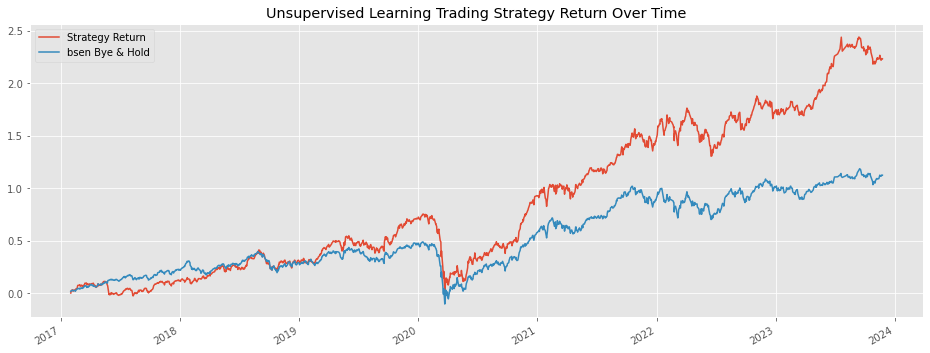

In [60]:
plt.style.use('ggplot')
portfolio_cumulative_return[:'2023-11-24'].plot(figsize=(16, 6))
plt.title("Unsupervised Learning Trading Strategy Return Over Time")
plt.show()